In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data schema/model
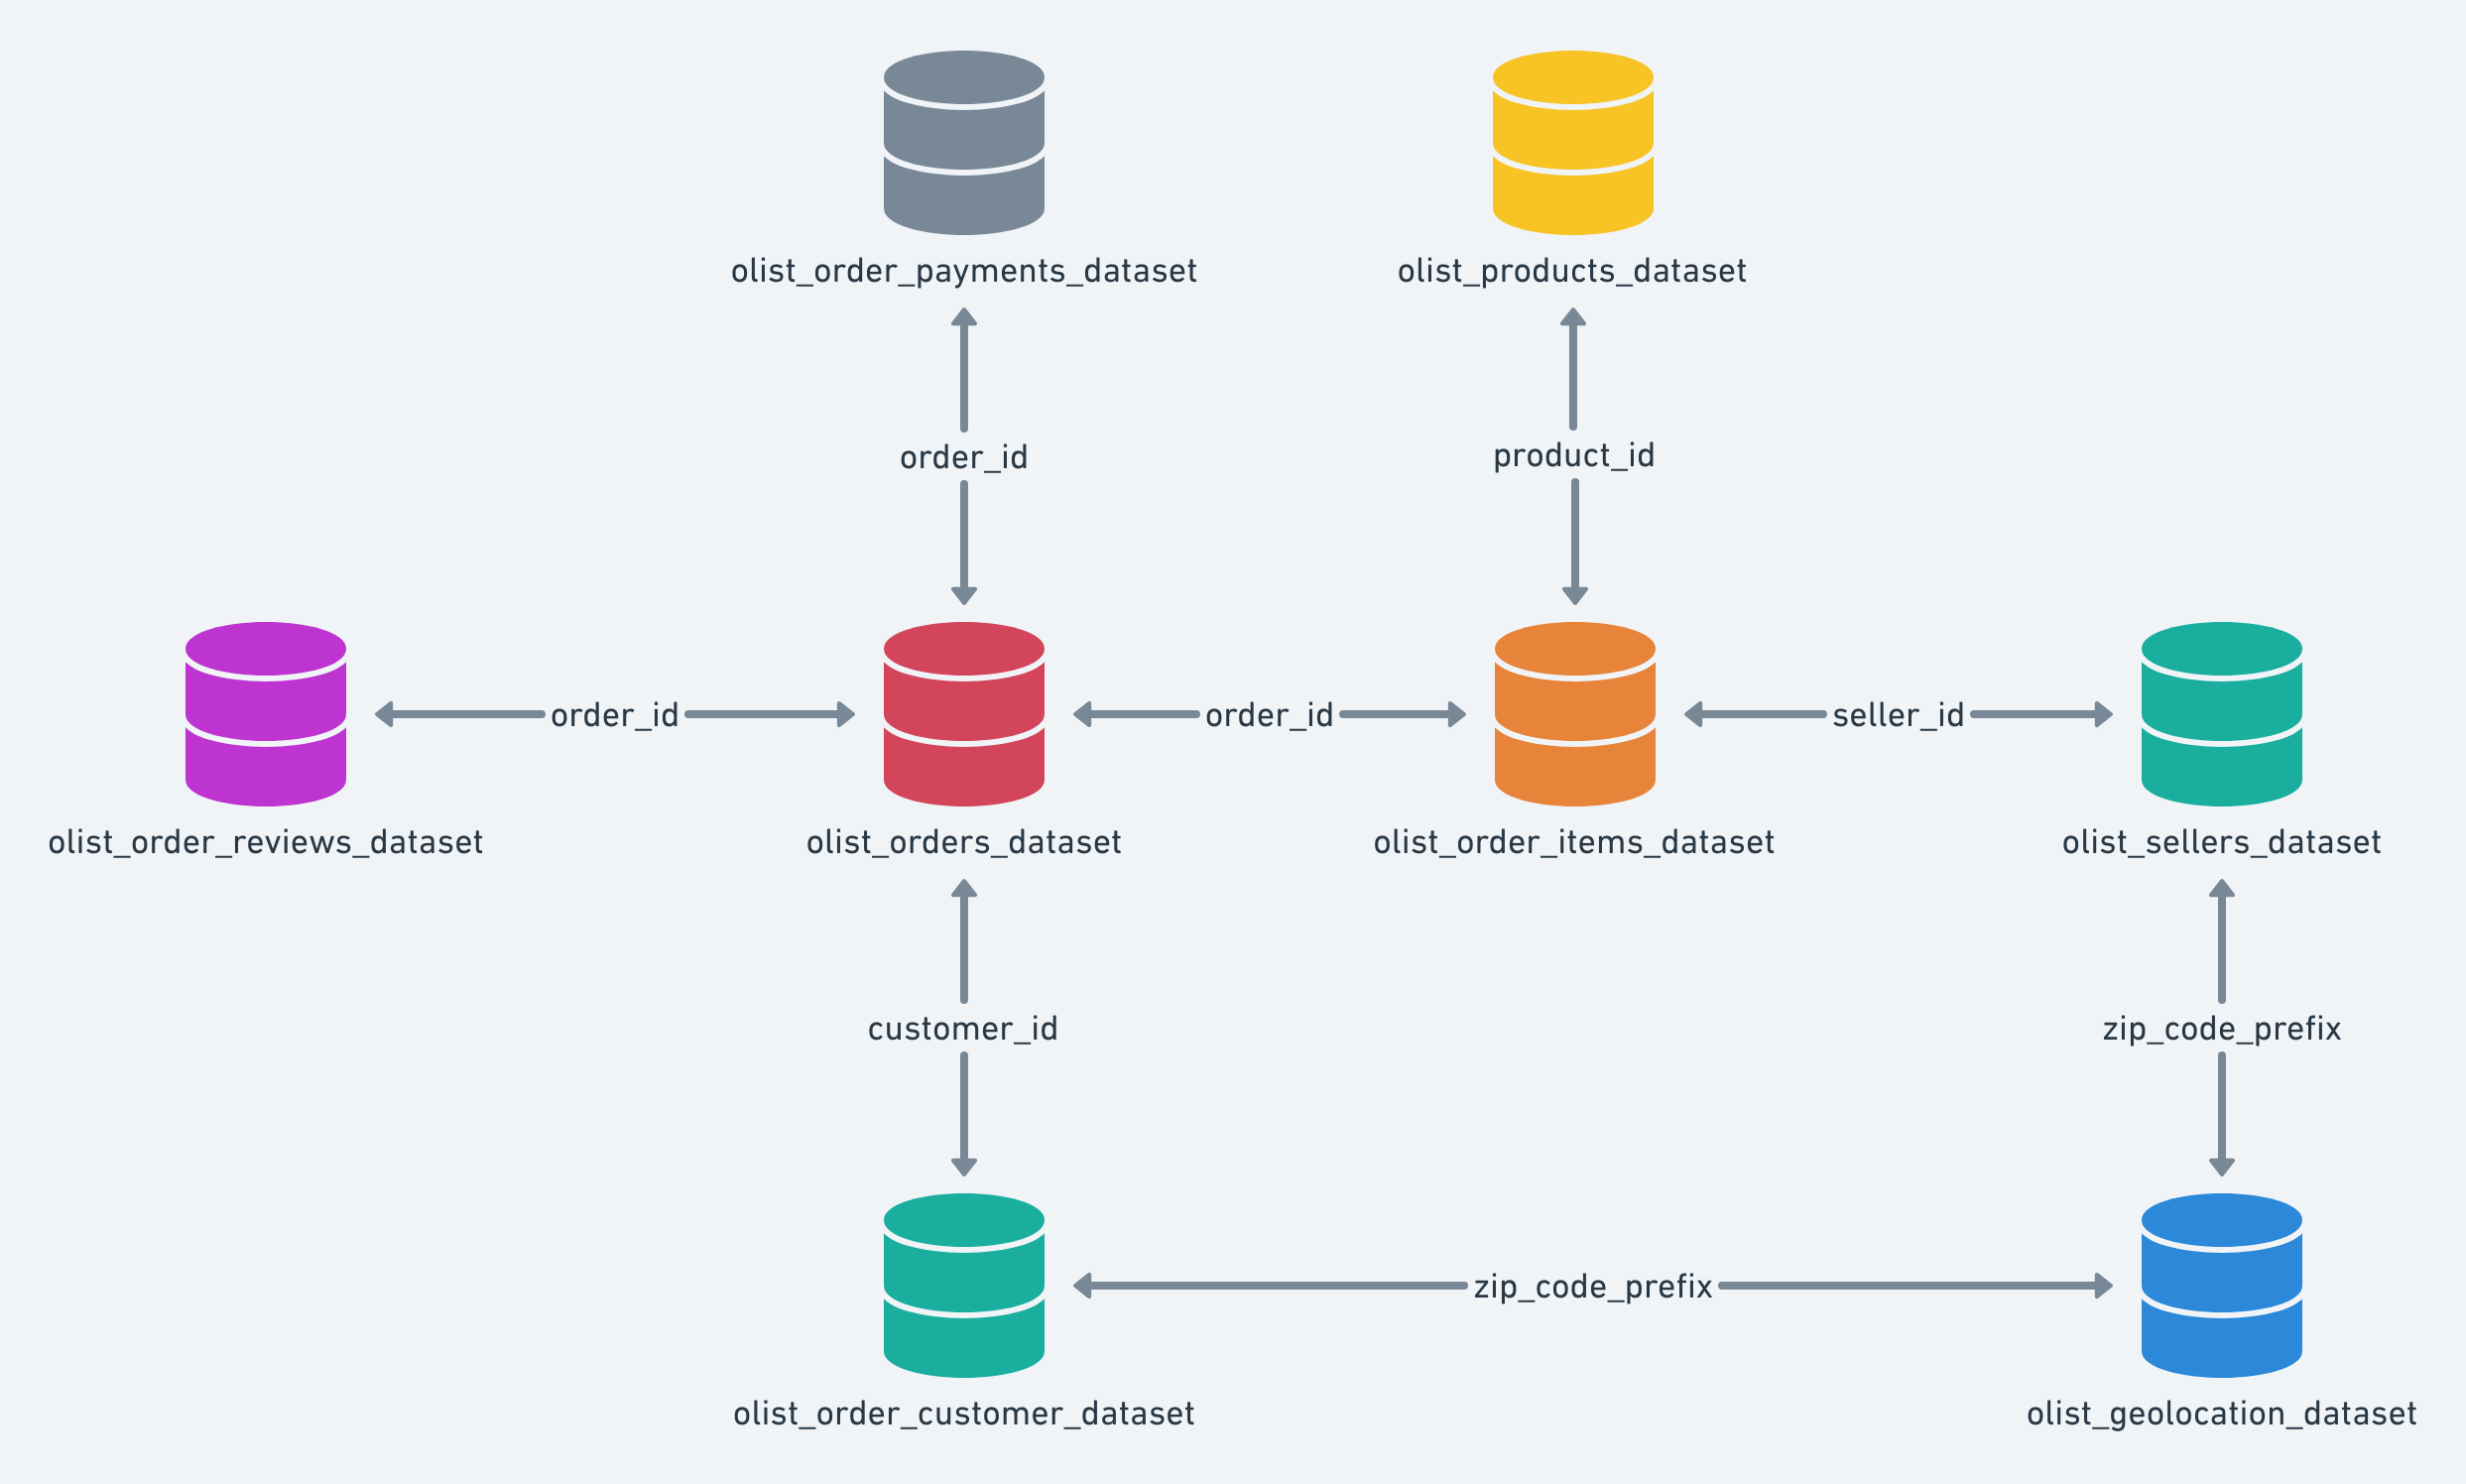

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# root_path = '../input/brazilian-ecommerce/'
root_path = ''

In [40]:
# linked with 'customer_id', 'zip_code_prefix'
customers = pd.read_csv(root_path + "olist_customers_dataset.csv")

# linked with 'order_id', 'customer_id'
# orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
# linked with 'order_id'
order_payments = pd.read_csv(root_path + "olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(root_path + "olist_order_reviews_dataset.csv")

# linked with 'order_id', 'product_id', 'seller_id'
order_items = pd.read_csv(root_path + "olist_order_items_dataset.csv")

# linked with 'product_id'
products = pd.read_csv(root_path + "olist_products_dataset.csv")

# linked with 'customer_id', 'zip_code_prefix'
sellers = pd.read_csv(root_path + "olist_sellers_dataset.csv")

# linked with'zip_code_prefix'
geolocation = pd.read_csv(root_path + "olist_geolocation_dataset.csv")

# translations of product_category_name data
category_translation = pd.read_csv('product_category_name_translation.csv')

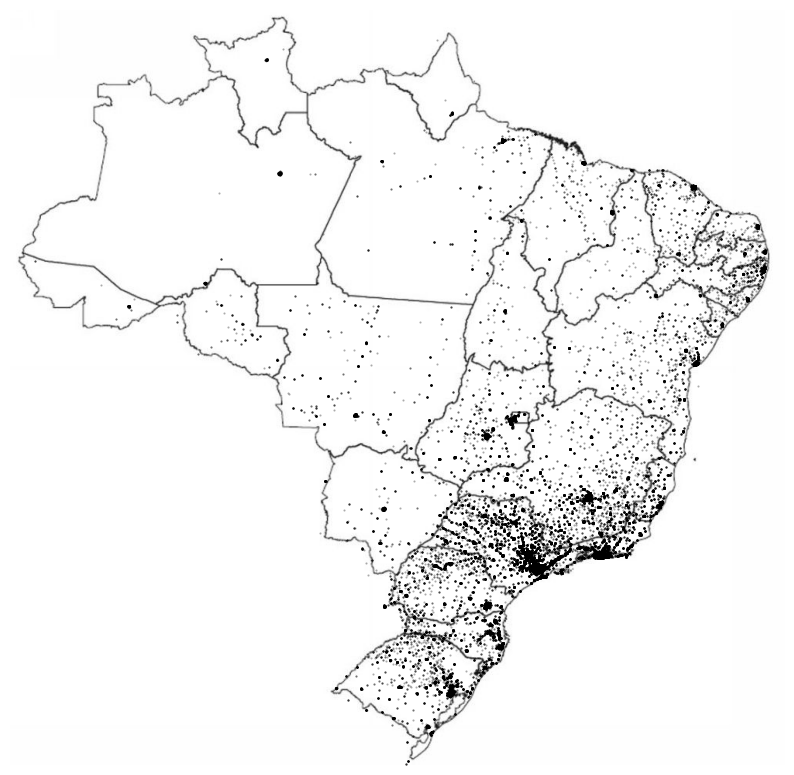

In [41]:
import urllib
import matplotlib.image as mpimg
other_state_geolocation = geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)
geolocation_cleaned = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_cleaned = geolocation_cleaned.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')
customers_location = customers.merge(geolocation_cleaned,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
def orders_on_brazil_map(data):
    #brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    brazil=mpimg.imread(("brazil_map.jpg"),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='black')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()
    
orders_on_brazil_map(customers_location.drop_duplicates(subset='customer_unique_id'))

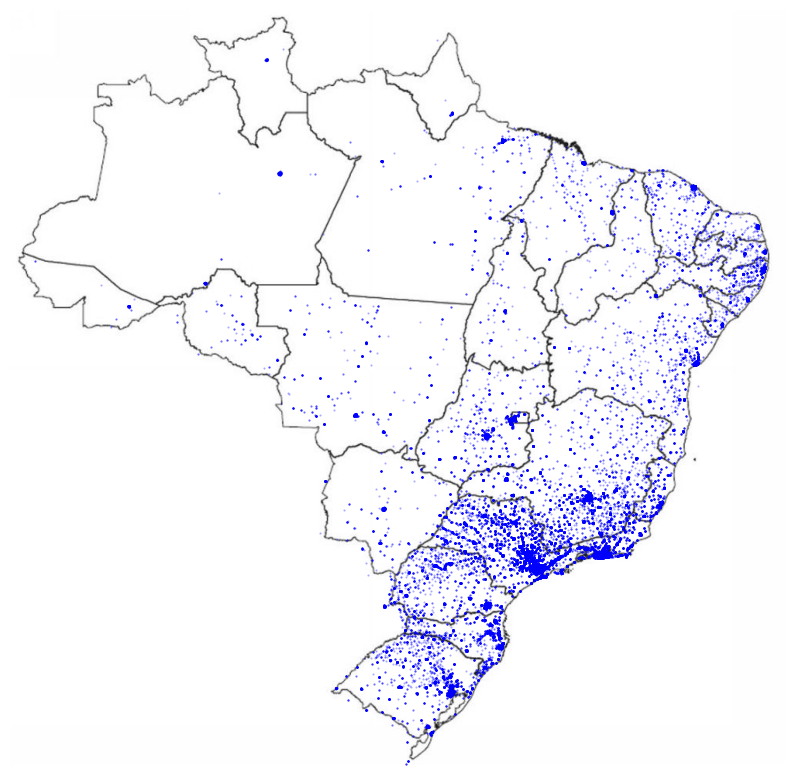

In [42]:
import urllib
import matplotlib.image as mpimg
geolocation_cleaned = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_cleaned = geolocation_cleaned.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')
customers_location = customers.merge(geolocation_cleaned,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
def orders_on_brazil_map(data):
    #brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    brazil=mpimg.imread(("brazil_map.jpg"),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()
    
orders_on_brazil_map(customers_location.drop_duplicates(subset='customer_unique_id'))

## rename categories

In [43]:
products = pd.merge(products, category_translation,how="left", on="product_category_name")

In [44]:
to_del = ["product_category_name", "product_weight_g","product_length_cm", "product_height_cm","product_width_cm"]
products.drop(to_del, axis=1, inplace=True)
products = products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
products

product_id  product_name_lenght  \
0      1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1      3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2      96bd76ec8810374ed1b65e291975717f                 46.0   
3      cef67bcfe19066a932b7673e239eb23d                 27.0   
4      9dc1a7de274444849c219cff195d0b71                 37.0   
...                                 ...                  ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                 45.0   
32947  bf4538d88321d0fd4412a93c974510e6                 41.0   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                 50.0   
32949  83808703fc0706a22e264b9d75f04a2e                 60.0   
32950  106392145fca363410d287a815be6de4                 58.0   

       product_description_lenght  product_photos_qty  \
0                           287.0                 1.0   
1                           276.0                 1.0   
2                           250.0                 1.0   
3                           261.0                 1.0   
4                           402.0                 4.0   
...                           ...                 ...   
32946                        67.0                 2.0   
32947                       971.0                 1.0   
32948                       799.0                 1.0   
32949                       156.0                 2.0   
32950                       309.0                 1.0   

           product_category_name  
0                      perfumery  
1                            art  
2                 sports_leisure  
3                           baby  
4                     housewares  
...                          ...  
32946            furniture_decor  
32947  construction_tools_lights  
32948             bed_bath_table  
32949      computers_accessories  
32950             bed_bath_table  

[32951 rows x 5 columns]

# join items to orders

In [45]:
order_items = pd.merge(order_items, orders, how="left",on="order_id")

# timestamp
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    order_items[col] = order_items[col].astype('datetime64[ns]')

to_del = ["seller_id", "shipping_limit_date","order_approved_at","order_delivered_carrier_date","order_estimated_delivery_date"]
order_items.drop(to_del,axis=1,inplace=True)
order_items["sale_month"] = order_items['order_purchase_timestamp'].dt.month
order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id   price  freight_value  \
0       4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1       e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2       c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3       7634da152a4610f1595efa32f14722fc   12.99          12.79   
4       ac6c3623068f30de03045865e4e10089  199.90          18.14   
...                                  ...     ...            ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  299.99          43.41   
112646  32e07fd915822b0765e448c4dd74c828  350.00          36.53   
112647  72a30483855e2eafc67aee5dc2560482   99.90          16.95   
112648  9c422a519119dcad7575db5af1ba540e   55.99           8.72   
112649  350688d9dc1e75ff97be326363655e01   43.00          12.79   

                             customer_id order_status  \
0       3ce436f183e68e07877b285a838db11a    delivered   
1       f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2       6489ae5e4333f3693df5ad4372dab6d3    delivered   
3       d4eb9395c8c0431ee92fce09860c5a06    delivered   
4       58dbd0b2d70206bf40e62cd34e84d795    delivered   
...                                  ...          ...   
112645  b51593916b4b8e0d6f66f2ae24f2673d    delivered   
112646  84c5d4fbaf120aae381fad077416eaa0    delivered   
112647  29309aa813182aaddc9b259e31b870e6    delivered   
112648  b5e6afd5a41800fdf401e0272ca74655    delivered   
112649  96d649da0cc4ff33bb408b199d4c7dcf    delivered   

       order_purchase_timestamp order_delivered_customer_date  sale_month  
0           2017-09-13 08:59:02           2017-09-20 23:43:48           9  
1           2017-04-26 10:53:06           2017-05-12 16:04:24           4  
2           2018-01-14 14:33:31           2018-01-22 13:19:16           1  
3           2018-08-08 10:00:35           2018-08-14 13:32:39           8  
4           2017-02-04 13:57:51           2017-03-01 16:42:31           2  
...                         ...                           ...         ...  
112645      2018-04-23 13:57:06           2018-05-10 22:56:40           4  
112646      2018-07-14 10:26:46           2018-07-23 20:31:55           7  
112647      2017-10-23 17:07:56           2017-10-28 12:22:22          10  
112648      2017-08-14 23:02:59           2017-08-16 21:59:40           8  
112649      2018-06-09 17:00:18           2018-06-14 17:56:26           6  

[112650 rows x 10 columns]

# differnt type payment & sequences

In [46]:
order_payments

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [47]:
group_payments = order_payments.groupby(by="order_id").agg({"payment_sequential": 'count',"payment_installments": 'sum'})

order_items = pd.merge(order_items, group_payments,how="left", on="order_id")
order_items = order_items.rename(columns={
    "payment_sequential": "count_payment_sequential",
    "payment_installments": "sum_payment_installments"})
order_items.head(5)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id   price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2  c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3  7634da152a4610f1595efa32f14722fc   12.99          12.79   
4  ac6c3623068f30de03045865e4e10089  199.90          18.14   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered      2017-04-26 10:53:06   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered      2018-01-14 14:33:31   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered      2018-08-08 10:00:35   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered      2017-02-04 13:57:51   

  order_delivered_customer_date  sale_month  count_payment_sequential  \
0           2017-09-20 23:43:48           9                       1.0   
1           2017-05-12 16:04:24           4                       1.0   
2           2018-01-22 13:19:16           1                       1.0   
3           2018-08-14 13:32:39           8                       1.0   
4           2017-03-01 16:42:31           2                       1.0   

   sum_payment_installments  
0                       2.0  
1                       3.0  
2                       5.0  
3                       2.0  
4                       3.0

# customers' reviews & review score

In [48]:
group_reviews = order_reviews.groupby("order_id").agg({"review_id": "count","review_score": "mean"})

order_items = pd.merge(order_items, group_reviews,how="left",on="order_id")
order_items = order_items.rename(columns={"review_id": "is_reviewed"})
order_items["is_reviewed"] = np.where(order_items["is_reviewed"] == 1,True, False)
order_items.head(5)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id   price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2  c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3  7634da152a4610f1595efa32f14722fc   12.99          12.79   
4  ac6c3623068f30de03045865e4e10089  199.90          18.14   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered      2017-04-26 10:53:06   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered      2018-01-14 14:33:31   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered      2018-08-08 10:00:35   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered      2017-02-04 13:57:51   

  order_delivered_customer_date  sale_month  count_payment_sequential  \
0           2017-09-20 23:43:48           9                       1.0   
1           2017-05-12 16:04:24           4                       1.0   
2           2018-01-22 13:19:16           1                       1.0   
3           2018-08-14 13:32:39           8                       1.0   
4           2017-03-01 16:42:31           2                       1.0   

   sum_payment_installments  is_reviewed  review_score  
0                       2.0         True           5.0  
1                       3.0         True           4.0  
2                       5.0         True           5.0  
3                       2.0         True           4.0  
4                       3.0         True           5.0

In [49]:
# to assemble all customers and orders:

In [50]:
order_items = pd.merge(order_items, customers,how="left",on="customer_id")

order_items.head(5)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id   price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2  c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3  7634da152a4610f1595efa32f14722fc   12.99          12.79   
4  ac6c3623068f30de03045865e4e10089  199.90          18.14   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered      2017-04-26 10:53:06   
2  6489ae5e4333f3693df5ad4372dab6d3    delivered      2018-01-14 14:33:31   
3  d4eb9395c8c0431ee92fce09860c5a06    delivered      2018-08-08 10:00:35   
4  58dbd0b2d70206bf40e62cd34e84d795    delivered      2017-02-04 13:57:51   

  order_delivered_customer_date  sale_month  count_payment_sequential  \
0           2017-09-20 23:43:48           9                       1.0   
1           2017-05-12 16:04:24           4                       1.0   
2           2018-01-22 13:19:16           1                       1.0   
3           2018-08-14 13:32:39           8                       1.0   
4           2017-03-01 16:42:31           2                       1.0   

   sum_payment_installments  is_reviewed  review_score  \
0                       2.0         True           5.0   
1                       3.0         True           4.0   
2                       5.0         True           5.0   
3                       2.0         True           4.0   
4                       3.0         True           5.0   

                 customer_unique_id  customer_zip_code_prefix  \
0  871766c5855e863f6eccc05f988b23cb                     28013   
1  eb28e67c4c0b83846050ddfb8a35d051                     15775   
2  3818d81c6709e39d06b2738a8d3a2474                     35661   
3  af861d436cfc08b2c2ddefd0ba074622                     12952   
4  64b576fb70d441e8f1b2d7d446e483c5                     13226   

           customer_city customer_state  
0  campos dos goytacazes             RJ  
1        santa fe do sul             SP  
2          para de minas             MG  
3                atibaia             SP  
4        varzea paulista             SP

In [51]:
data = pd.merge(order_items, products,how="left",on="product_id")
data

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id   price  freight_value  \
0       4244733e06e7ecb4970a6e2683c13e61   58.90          13.29   
1       e5f2d52b802189ee658865ca93d83a8f  239.90          19.93   
2       c777355d18b72b67abbeef9df44fd0fd  199.00          17.87   
3       7634da152a4610f1595efa32f14722fc   12.99          12.79   
4       ac6c3623068f30de03045865e4e10089  199.90          18.14   
...                                  ...     ...            ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  299.99          43.41   
112646  32e07fd915822b0765e448c4dd74c828  350.00          36.53   
112647  72a30483855e2eafc67aee5dc2560482   99.90          16.95   
112648  9c422a519119dcad7575db5af1ba540e   55.99           8.72   
112649  350688d9dc1e75ff97be326363655e01   43.00          12.79   

                             customer_id order_status  \
0       3ce436f183e68e07877b285a838db11a    delivered   
1       f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2       6489ae5e4333f3693df5ad4372dab6d3    delivered   
3       d4eb9395c8c0431ee92fce09860c5a06    delivered   
4       58dbd0b2d70206bf40e62cd34e84d795    delivered   
...                                  ...          ...   
112645  b51593916b4b8e0d6f66f2ae24f2673d    delivered   
112646  84c5d4fbaf120aae381fad077416eaa0    delivered   
112647  29309aa813182aaddc9b259e31b870e6    delivered   
112648  b5e6afd5a41800fdf401e0272ca74655    delivered   
112649  96d649da0cc4ff33bb408b199d4c7dcf    delivered   

       order_purchase_timestamp order_delivered_customer_date  sale_month  \
0           2017-09-13 08:59:02           2017-09-20 23:43:48           9   
1           2017-04-26 10:53:06           2017-05-12 16:04:24           4   
2           2018-01-14 14:33:31           2018-01-22 13:19:16           1   
3           2018-08-08 10:00:35           2018-08-14 13:32:39           8   
4           2017-02-04 13:57:51           2017-03-01 16:42:31           2   
...                         ...                           ...         ...   
112645      2018-04-23 13:57:06           2018-05-10 22:56:40           4   
112646      2018-07-14 10:26:46           2018-07-23 20:31:55           7   
112647      2017-10-23 17:07:56           2017-10-28 12:22:22          10   
112648      2017-08-14 23:02:59           2017-08-16 21:59:40           8   
112649      2018-06-09 17:00:18           2018-06-14 17:56:26           6   

        ...  is_reviewed  review_score                customer_unique_id  \
0       ...         True           5.0  871766c5855e863f6eccc05f988b23cb   
1       ...         True           4.0  eb28e67c4c0b83846050ddfb8a35d051   
2       ...         True           5.0  3818d81c6709e39d06b2738a8d3a2474   
3       ...         True           4.0  af861d436cfc08b2c2ddefd0ba074622   
4       ...         True           5.0  64b576fb70d441e8f1b2d7d446e483c5   
...     ...          ...           ...                               ...   
112645  ...         True           5.0  0c9aeda10a71f369396d0c04dce13a64   
112646  ...         True           5.0  0da9fe112eae0c74d3ba1fe16de0988b   
112647  ...         True           5.0  cd79b407828f02fdbba457111c38e4c4   
112648  ...         True           5.0  eb803377c9315b564bdedad672039306   
112649  ...         True           5.0  cd76a00d8e3ca5e6ab9ed9ecb6667ac4

In [52]:
data.columns

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'sale_month',
       'count_payment_sequential', 'sum_payment_installments', 'is_reviewed',
       'review_score', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'product_category_name'],
      dtype='object')

# delivery delay

In [53]:
data["delivery_days"] = (data.order_delivered_customer_date - data.order_purchase_timestamp).dt.round('1d').dt.days
data.drop("order_delivered_customer_date", axis=1, inplace=True)

# product categories simplification

In [55]:
data['product_category'] = np.where((data['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           np.where((data['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((data['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((data['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((data['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((data['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           np.where((data['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                           np.where((data['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((data['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))
data.drop("product_category_name", axis=1, inplace=True)

#  catégories encoding

In [56]:
categories_customers = data.groupby(["customer_unique_id", "product_category"])\
                        .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)
categories_customers["total_items"] = categories_customers.sum(axis=1)

# ratio of total items
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])

categories_customers.reset_index(inplace=True)
categories_customers.head(5)

product_category                customer_unique_id  books_cds_media  \
0                 0000366f3b9a7992bf8c76cfdf3221e2              0.0   
1                 0000b849f77a49e4a4ce2b2a4ca5be3f              0.0   
2                 0000f46a3911fa3c0805444483337064              0.0   
3                 0000f6ccb0745a6a4b88665a16c9f078              0.0   
4                 0004aac84e0df4da2b147fca70cf8255              0.0   

product_category  fashion_clothing_accessories  flowers_gifts  \
0                                          0.0            0.0   
1                                          0.0            0.0   
2                                          0.0            0.0   
3                                          0.0            0.0   
4                                          0.0            0.0   

product_category  groceries_food_drink  health_beauty  home_furniture  other  \
0                                  0.0            0.0             1.0    0.0   
1                                  0.0            1.0             0.0    0.0   
2                                  0.0            0.0             0.0    1.0   
3                                  0.0            0.0             0.0    0.0   
4                                  0.0            0.0             0.0    0.0   

product_category  sport  technology  toys_baby  total_items  
0                   0.0         0.0        0.0          1.0  
1                   0.0         0.0        0.0          1.0  
2                   0.0         0.0        0.0          1.0  
3                   0.0         1.0        0.0          1.0  
4                   0.0         1.0        0.0          1.0

# products average per order

In [58]:
products_per_order = data.groupby(["customer_unique_id", "order_id"]).agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id").agg({"order_item_id": "mean"})

In [59]:
# delays between order(s)

In [60]:
recurencies = data.groupby("customer_unique_id")\
                .agg({"order_purchase_timestamp": ["min","max"]})
recurencies.columns = recurencies.columns.droplevel(0)

# Max date in dataset
max_date = data["order_purchase_timestamp"].max()

# Delay from the last order
recurencies["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (max_date - y[0]).round('1d').days 
                                    for x,y in recurencies.iterrows()]
recurencies.drop(["min", "max"], axis=1, inplace=True)

# Final Dataset
Group by customers with sum or mean

In [62]:
data = data.groupby("customer_unique_id")\
            .agg({"order_id": "nunique", #count different values
                  "price": "sum",
                  "freight_value": "sum",
                  "count_payment_sequential": "mean", 
                  "sum_payment_installments": "mean", 
                  "review_score": "mean",
                  "delivery_days": "mean",
                  "sale_month": lambda x:x.value_counts().index[0]}) #the most representative

In [63]:
# Rename columns, to be close to reality
data = data.rename(columns={"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "nb_payment_sequential": "mean_payment_sequential",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score",
                            "delivery_days": "mean_delivery_days",
                            "sale_month": "favorite_sale_month"})

# Merge with other calculated features
data = pd.merge(data, categories_customers,how="left",on="customer_unique_id")

data = pd.merge(data, products_per_order,how="left",on="customer_unique_id").rename(columns={"order_item_id": "mean_nb_items"})

data = pd.merge(data, recurencies,how="left",on="customer_unique_id")

data.columns

Index(['customer_unique_id', 'nb_orders', 'total_spend', 'total_freight',
       'count_payment_sequential', 'mean_payment_installments',
       'mean_review_score', 'delivery_days', 'favorite_sale_month',
       'books_cds_media', 'fashion_clothing_accessories', 'flowers_gifts',
       'groceries_food_drink', 'health_beauty', 'home_furniture', 'other',
       'sport', 'technology', 'toys_baby', 'total_items', 'mean_nb_items',
       'order_total_delay'],
      dtype='object')

In [64]:
data

customer_unique_id  nb_orders  total_spend  \
0      0000366f3b9a7992bf8c76cfdf3221e2          1       129.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f          1        18.90   
2      0000f46a3911fa3c0805444483337064          1        69.00   
3      0000f6ccb0745a6a4b88665a16c9f078          1        25.99   
4      0004aac84e0df4da2b147fca70cf8255          1       180.00   
...                                 ...        ...          ...   
95415  fffcf5a5ff07b0908bd4e2dbc735a684          1      1570.00   
95416  fffea47cd6d3cc0a88bd621562a9d061          1        64.89   
95417  ffff371b4d645b6ecea244b27531430a          1        89.90   
95418  ffff5962728ec6157033ef9805bacc48          1       115.00   
95419  ffffd2657e2aad2907e67c3e9daecbeb          1        56.99   

       total_freight  count_payment_sequential  mean_payment_installments  \
0              12.00                       1.0                        8.0   
1               8.29                       1.0                        1.0   
2              17.22                       1.0                        8.0   
3              17.63                       1.0                        4.0   
4              16.89                       1.0                        6.0   
...              ...                       ...                        ...   
95415         497.42                       1.0                       10.0   
95416          19.69                       1.0                        1.0   
95417          22.56                       1.0                        1.0   
95418          18.69                       1.0                        5.0   
95419          14.57                       1.0                        4.0   

       mean_review_score  delivery_days  favorite_sale_month  books_cds_media  \
0                    5.0            6.0                    5              0.0   
1                    4.0            3.0                    5              0.0   
2                    3.0           26.0                    3              0.0   
3                    4.0           20.0                   10              0.0   
4                    5.0           13.0                   11              0.0   
...                  ...            ...                  ...              ...   
95415                5.0           28.0                    6              0.0   
95416                4.0           30.0                   12              0.0   
95417                5.0           15.0                    2              0.0   
95418                5.0           12.0                    5              0.0   
95419                5.0            8.0                    5              0.0   

       ...  groceries_food_drink  health_beauty  home_furniture  other  sport  \
0      ...                   0.0            0.0             1.0    0.0    0.0   
1      ...                   0.0            1.0             0.0    0.0    0.0   
2      ...                   0.0            0.0             0.0    1.0    0.0   
3      ...                   0.0            0.0             0.0    0.0    0.0   
4      ...                   0.0            0.0             0.0    0.0    0.0   
...    ...                   ...            ...             ...    ...    ...   
95415  ...                   0.0            1.0             0.0    0.0    0.0   
95416  ...                   0.0            0.0             0.0    0.0    0.0   
95417  ...                   0.0            0.0             0.0    1.0    0.0   
95418  ...                   0.0            0.0             0.0    0.0    0.0   
95419  ...                   0.0            1.0             0.0    0.0    0.0   

       technology  toys_baby  total_items  mean_nb_items  order_total_delay  
0             0.0        0.0          1.0            1.0                116  
1             0.0        0.0          1.0            1.0                119  
2             0.0        0.0          1.0            1.0                542  
3             1.0        0.0     

In [ ]:
# more data engineering 

# to calculate mean delay 

In [66]:
data["order_total_delay"] = data["order_total_delay"] / data["nb_orders"]
data = data.rename(columns={"order_total_delay": "order_mean_delay"})

## to calculate price per order

In [67]:
data["freight_ratio"] = round(data["total_freight"] / (data["total_spend"] + data["total_freight"]),2)

## to calculate the order price average

In [69]:
data["mean_price_order"] = round(data["total_spend"] / data["nb_orders"],2)

# te recalculate the total spent

In [70]:
data["total_spend"] = (data["total_spend"] + data["total_freight"])
data.drop("total_freight", axis=1, inplace=True)

# customers informations

In [71]:
customers.drop("customer_id", axis=1, inplace=True)

# to select the most frequents values for each customer
customers_info = customers.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])

data = pd.merge(data, customers_info, how="left", on="customer_unique_id")

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95420 entries, 0 to 95419
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            95420 non-null  object 
 1   nb_orders                     95420 non-null  int64  
 2   total_spend                   95420 non-null  float64
 3   count_payment_sequential      95419 non-null  float64
 4   mean_payment_installments     95419 non-null  float64
 5   mean_review_score             94721 non-null  float64
 6   delivery_days                 93356 non-null  float64
 7   favorite_sale_month           95420 non-null  int64  
 8   books_cds_media               95420 non-null  float64
 9   fashion_clothing_accessories  95420 non-null  float64
 10  flowers_gifts                 95420 non-null  float64
 11  groceries_food_drink          95420 non-null  float64
 12  health_beauty                 95420 non-null  float64
 13  h

In [73]:
# Find features to fill and fillna with mode
features_to_fill = data.isnull().sum()
features_to_fill = list(features_to_fill[features_to_fill.values > 0].index)

for f in features_to_fill:
    data[f] = data[f].fillna(data[f].mode()[0])
    print(f, data[f].mode()[0])

count_payment_sequential 1.0
mean_payment_installments 1.0
mean_review_score 5.0
delivery_days 7.0


In [ ]:
# to become states more readable 

In [74]:
data["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'RR', 'AP', 'RO'], dtype=object)

In [91]:
url = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
states_table = pd.read_html(url)[3].set_index("Code")
states_table

Flag and name         Capital    Largest city  Area (km2)[20]  \
Code                                                                        
AC                   Acre      Rio Branco      Rio Branco          164123   
AL                Alagoas          Maceió          Maceió           27779   
AP                  Amapá          Macapá          Macapá          142829   
AM               Amazonas          Manaus          Manaus         1559159   
BA                  Bahia        Salvador        Salvador          564733   
CE                  Ceará       Fortaleza       Fortaleza          148921   
DF       Distrito Federal        Brasília        Brasília            5780   
ES         Espírito Santo         Vitória           Serra           46095   
GO                  Goiás         Goiânia         Goiânia          340112   
MA               Maranhão        São Luís        São Luís          331937   
MT            Mato Grosso          Cuiabá          Cuiabá          903366   
MS     Mato Grosso do Sul    Campo Grande    Campo Grande          357146   
MG           Minas Gerais  Belo Horizonte  Belo Horizonte          586522   
PA                   Pará           Belém           Belém         1247955   
PB                Paraíba     João Pessoa     João Pessoa           56470   
PR                 Paraná        Curitiba        Curitiba          199308   
PE             Pernambuco          Recife          Recife           98148   
PI                  Piauí        Teresina        Teresina          251578   
RJ         Rio de Janeiro  Rio de Janeiro  Rio de Janeiro           43780   
RN    Rio Grande do Norte           Natal           Natal           52811   
RS      Rio Grande do Sul    Porto Alegre    Porto Alegre          281730   
RO               Rondônia     Porto Velho     Porto Velho          237591   
RR                Roraima       Boa Vista       Boa Vista          224301   
SC         Santa Catarina   Florianópolis       Joinville           95736   
SP              São Paulo       São Paulo       São Paulo          248223   
SE                Sergipe         Aracaju         Aracaju           21915   
TO              Tocantins          Palmas          Palmas          277721   

      Population (February 2023)[21]  Density (per km2, 2022)  \
Code                                                            
AC                            916000                     6.34   
AL                           3383000                   125.52   
AP                            873000                     2.63   
AM                           4226000                     2.58   
BA                          15063000                    30.52   
CE                           8934000                    60.33   
DF                           3164000                   493.00   
ES                           4025000                    80.63   
GO                           7157000                    18.46   
MA                           7196000                    19.03   
MT                           3386000                     4.01   
MS                           2873000                     7.83   
MG                          21263000                    31.72   
PA                           8637000                     7.02   
PB                           4174000                    78.93   
PR                          11606000                    43.46   
PE                           9636000                   103.83   
PI                           3333000                     9.73   
RJ                          17363000                   387.46   
RN                           3614000                    62.74   
RS                          11456000                    36.84   
RO                           1831000                     7.34   
RR                            684000                     2.54   
SC                           7204000                    69.74   
SP                          46257000                   175.73   
SE                     

In [92]:
data = pd.merge(data.reset_index(), states_table[["Flag and name"]],how="left",left_on="customer_state",right_on="Code")
data.drop("customer_state", axis=1, inplace=True)
data = data.rename(columns={"Flag and name": "customer_state"})

<AxesSubplot: xlabel='customer_state', ylabel='total_spend'>

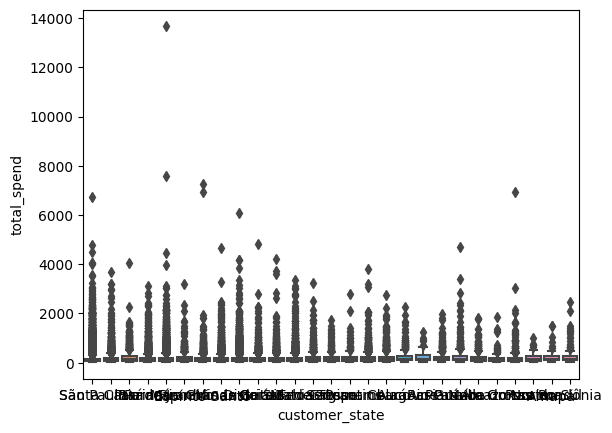

In [95]:
import seaborn as sns
sns.boxplot(x="customer_state", y="total_spend", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'São Paulo'),
  Text(1, 0, 'Santa Catarina'),
  Text(2, 0, 'Pará'),
  Text(3, 0, 'Paraná'),
  Text(4, 0, 'Rio de Janeiro'),
  Text(5, 0, 'Maranhão'),
  Text(6, 0, 'Espírito Santo'),
  Text(7, 0, 'Rio Grande do Sul'),
  Text(8, 0, 'Minas Gerais'),
  Text(9, 0, 'Goiás'),
  Text(10, 0, 'Distrito Federal'),
  Text(11, 0, 'Bahia'),
  Text(12, 0, 'Mato Grosso'),
  Text(13, 0, 'Sergipe'),
  Text(14, 0, 'Tocantins'),
  Text(15, 0, 'Pernambuco'),
  Text(16, 0, 'Ceará'),
  Text(17, 0, 'Alagoas'),
  Text(18, 0, 'Acre'),
  Text(19, 0, 'Piauí'),
  Text(20, 0, 'Paraíba'),
  Text(21, 0, 'Rio Grande do Norte'),
  Text(22, 0, 'Amazonas'),
  Text(23, 0, 'Mato Grosso do Sul'),
  Text(24, 0, 'Roraima'),
  Text(25, 0, 'Amapá'),
  Text(26, 0, 'Rondônia')])

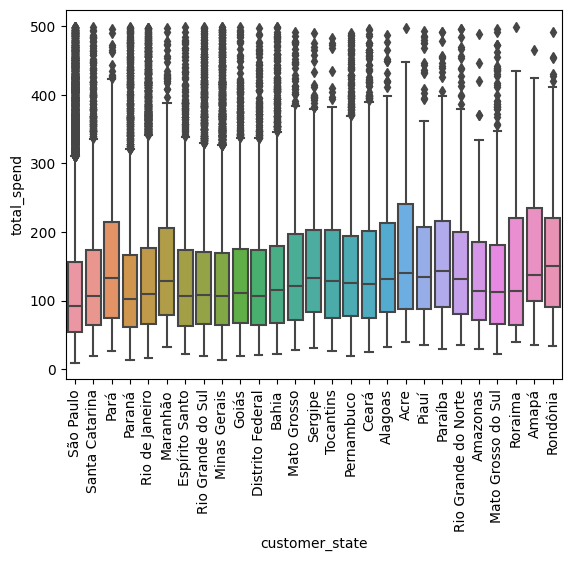

In [97]:
sns.boxplot(x="customer_state", y="total_spend", data=data[data["total_spend"]<500])
plt.xticks(rotation=90)

# pearson correlations on final dataset

C:\Users\jaban\AppData\Local\Temp\ipykernel_20892\3757570514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


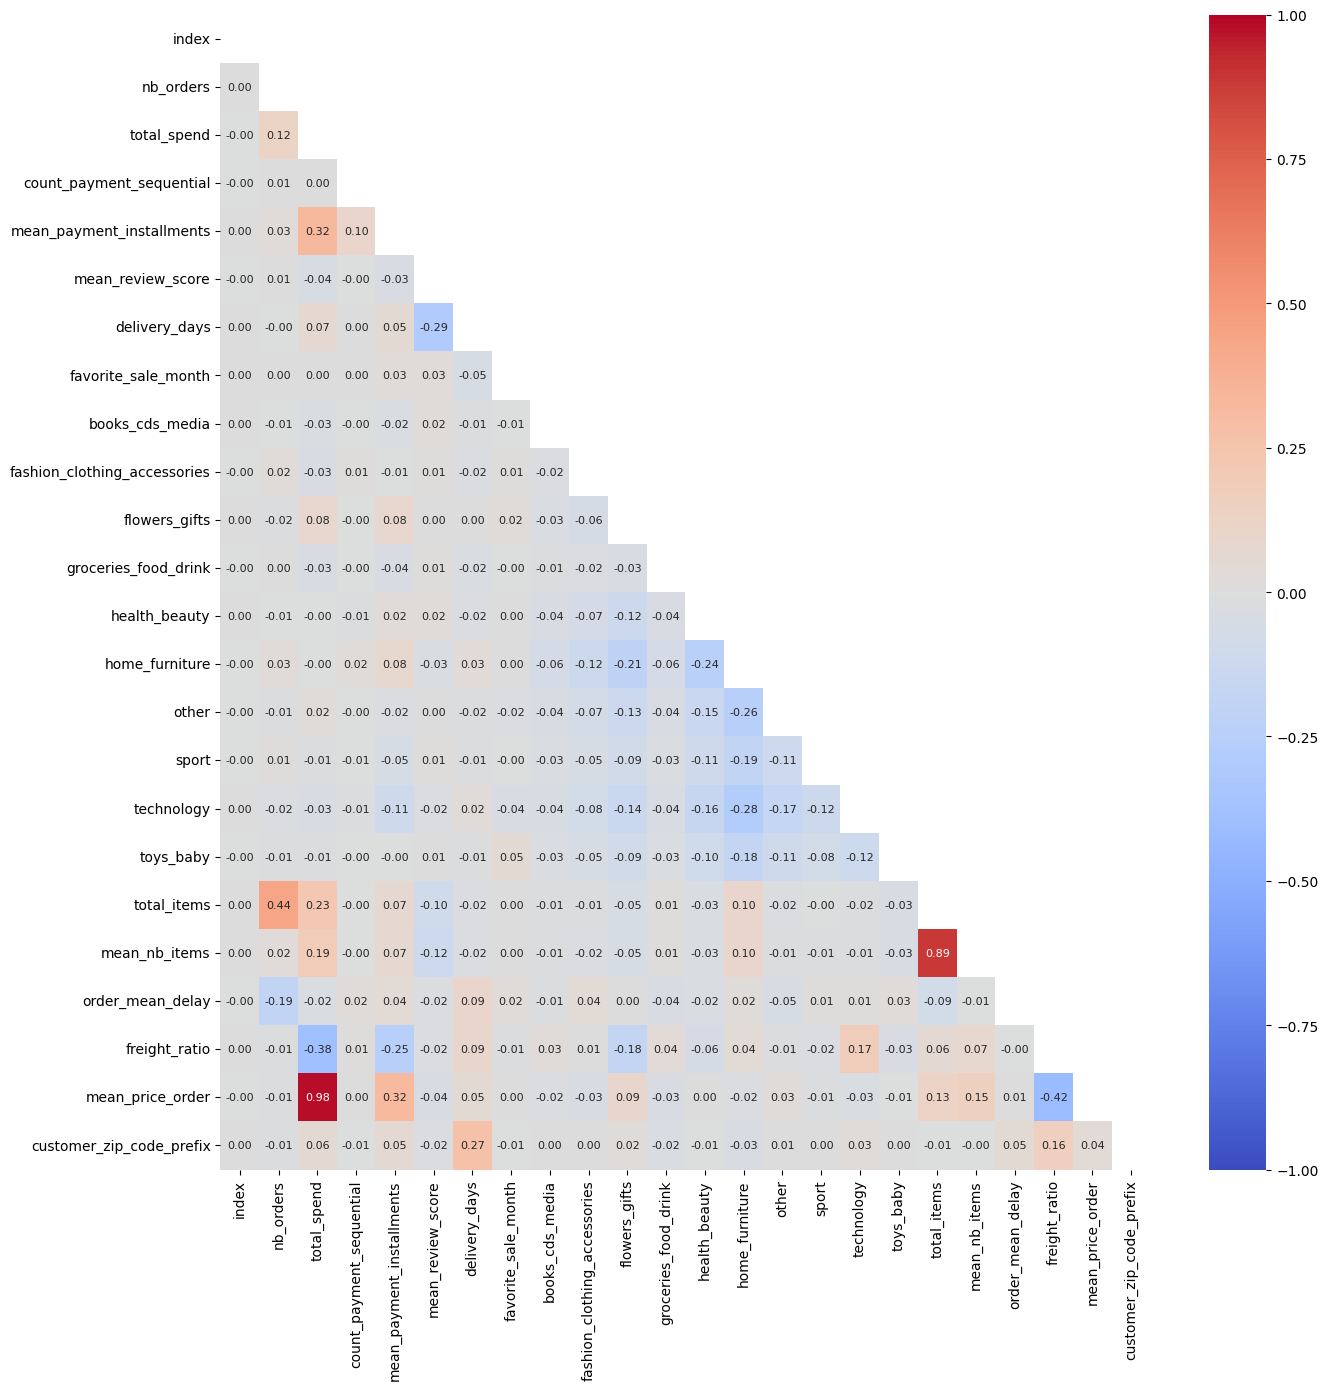

In [99]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.show()

In [103]:
data.drop(["customer_zip_code_prefix",
           "customer_city",
           "customer_state",
           "mean_price_order",
           "mean_nb_items"], axis=1, inplace=True)

C:\Users\jaban\AppData\Local\Temp\ipykernel_20892\3757570514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


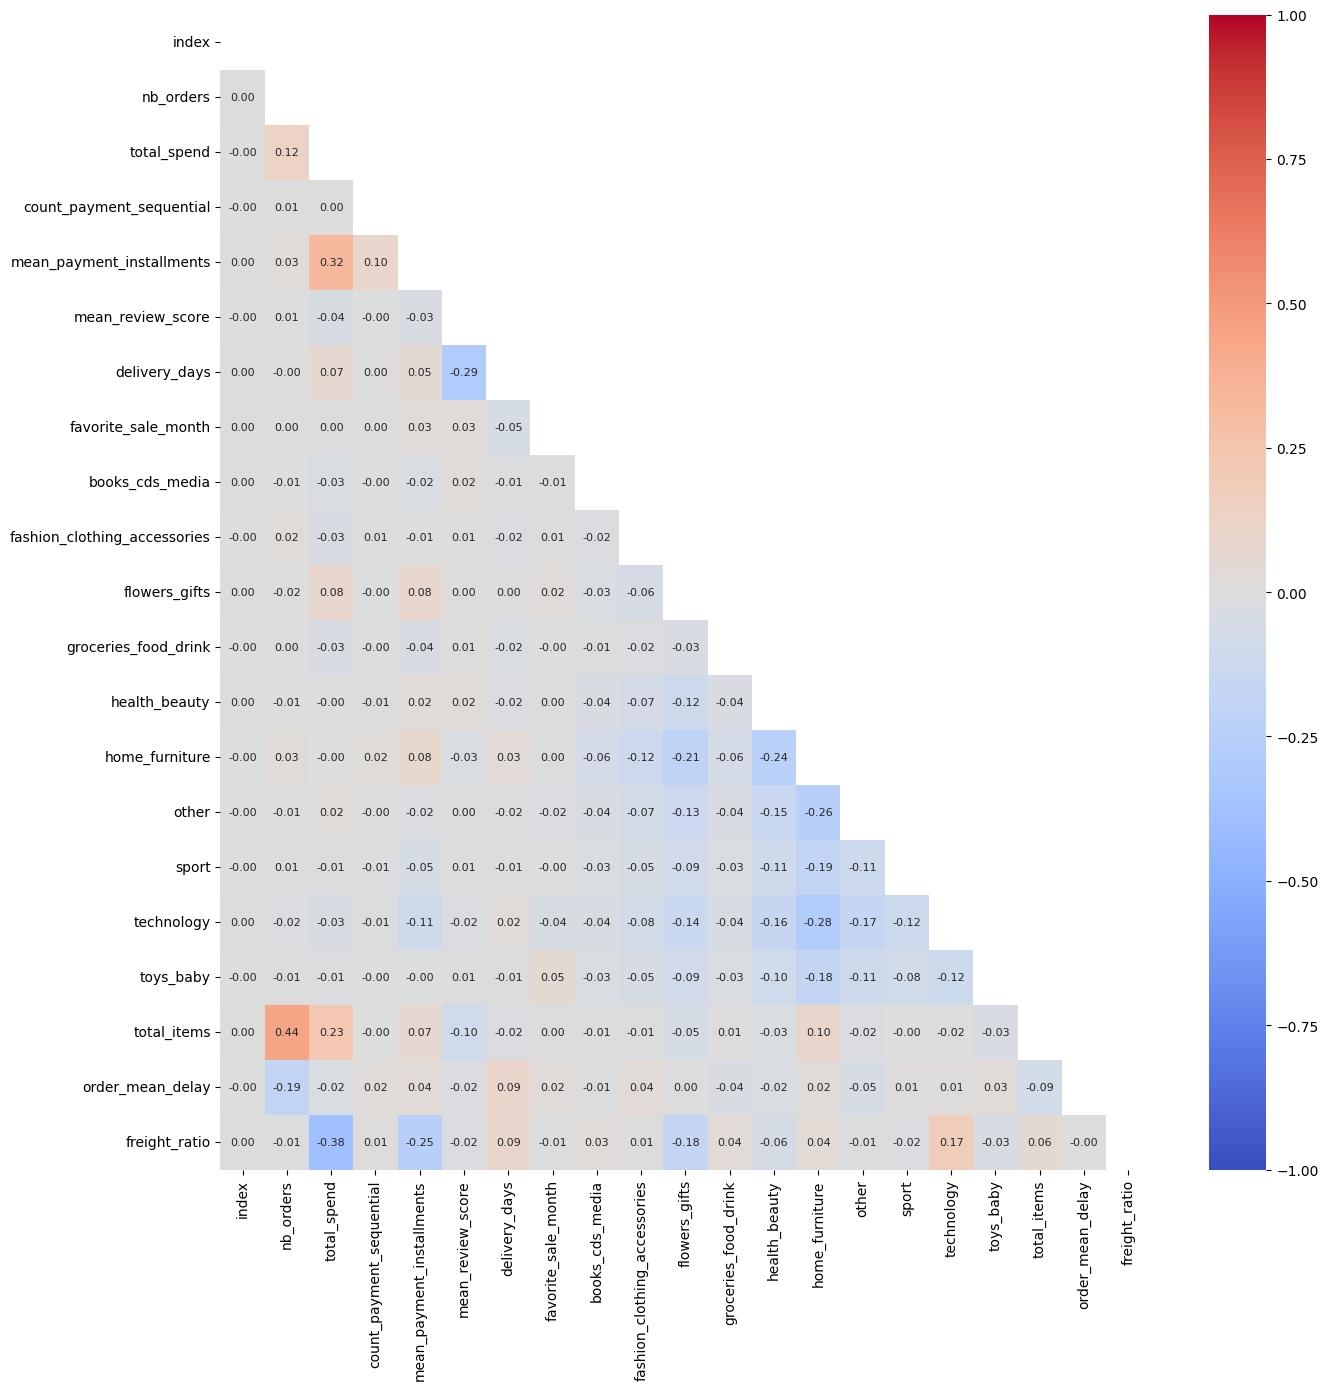

In [104]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.show()

In [111]:
# Standards Librairies import
%matplotlib inline
import os
from time import time
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes

mpl.rcParams["figure.figsize"] = (12, 8)
init_notebook_mode()
warnings.filterwarnings('ignore')

In [128]:
X = data.copy()

categories_col = ['books_cds_media',
                  'fashion_clothing_accessories',
                  'flowers_gifts',
                  'groceries_food_drink',
                  'health_beauty',
                  'home_furniture',
                  'other',
                  'sport',
                  'technology',
                  'toys_baby']

X = X.drop(categories_col, axis=1)
X=X.drop("customer_unique_id",axis=1)
X=X.drop("index",axis=1)
X.head(6)

nb_orders  total_spend  count_payment_sequential  \
0          1       141.90                       1.0   
1          1        27.19                       1.0   
2          1        86.22                       1.0   
3          1        43.62                       1.0   
4          1       196.89                       1.0   
5          1       166.98                       1.0   

   mean_payment_installments  mean_review_score  delivery_days  \
0                        8.0                5.0            6.0   
1                        1.0                4.0            3.0   
2                        8.0                3.0           26.0   
3                        4.0                4.0           20.0   
4                        6.0                5.0           13.0   
5                        8.0                4.0            2.0   

   favorite_sale_month  total_items  order_mean_delay  freight_ratio  
0                    5          1.0             116.0           0.08  
1                    5          1.0             119.0           0.30  
2                    3          1.0             542.0           0.20  
3                   10          1.0             326.0           0.40  
4                   11          1.0             293.0           0.09  
5                    4          1.0             151.0           0.08

In [129]:
# numerical_features = list(data.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features = list(X.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['nb_orders',
 'total_spend',
 'count_payment_sequential',
 'mean_payment_installments',
 'mean_review_score',
 'delivery_days',
 'favorite_sale_month',
 'total_items',
 'order_mean_delay',
 'freight_ratio']

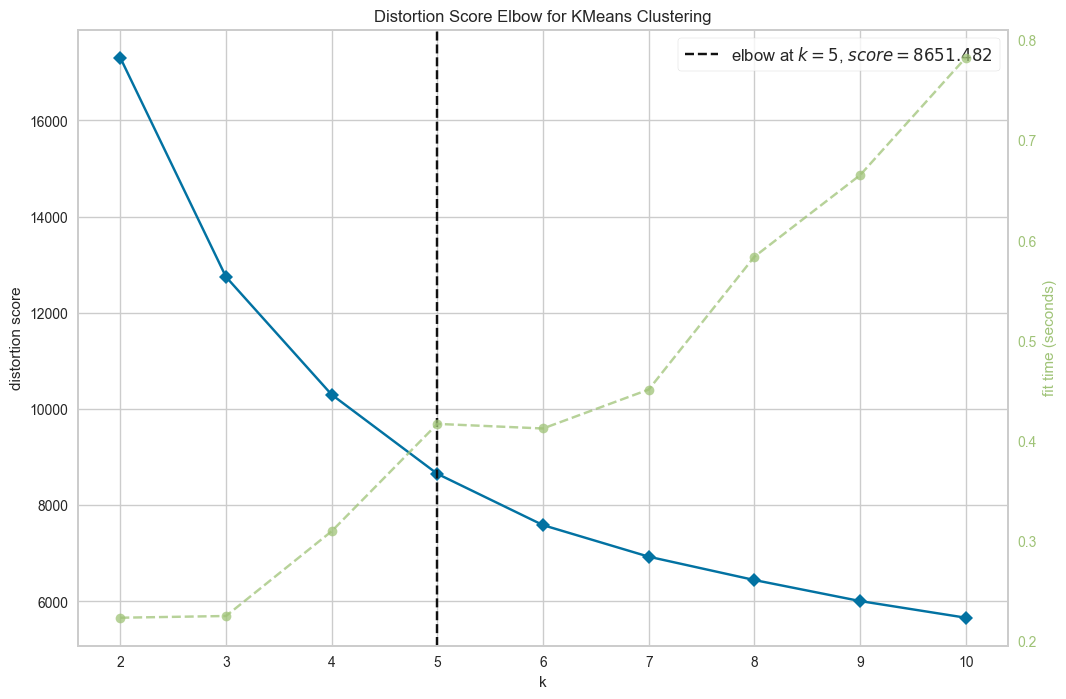

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [130]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

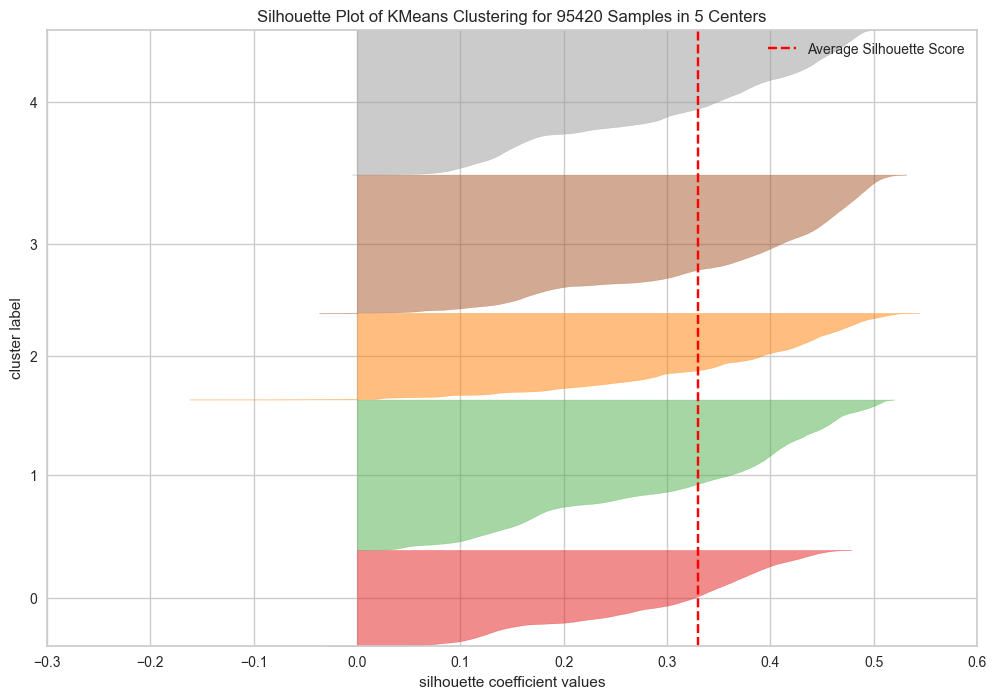

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 95420 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [131]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

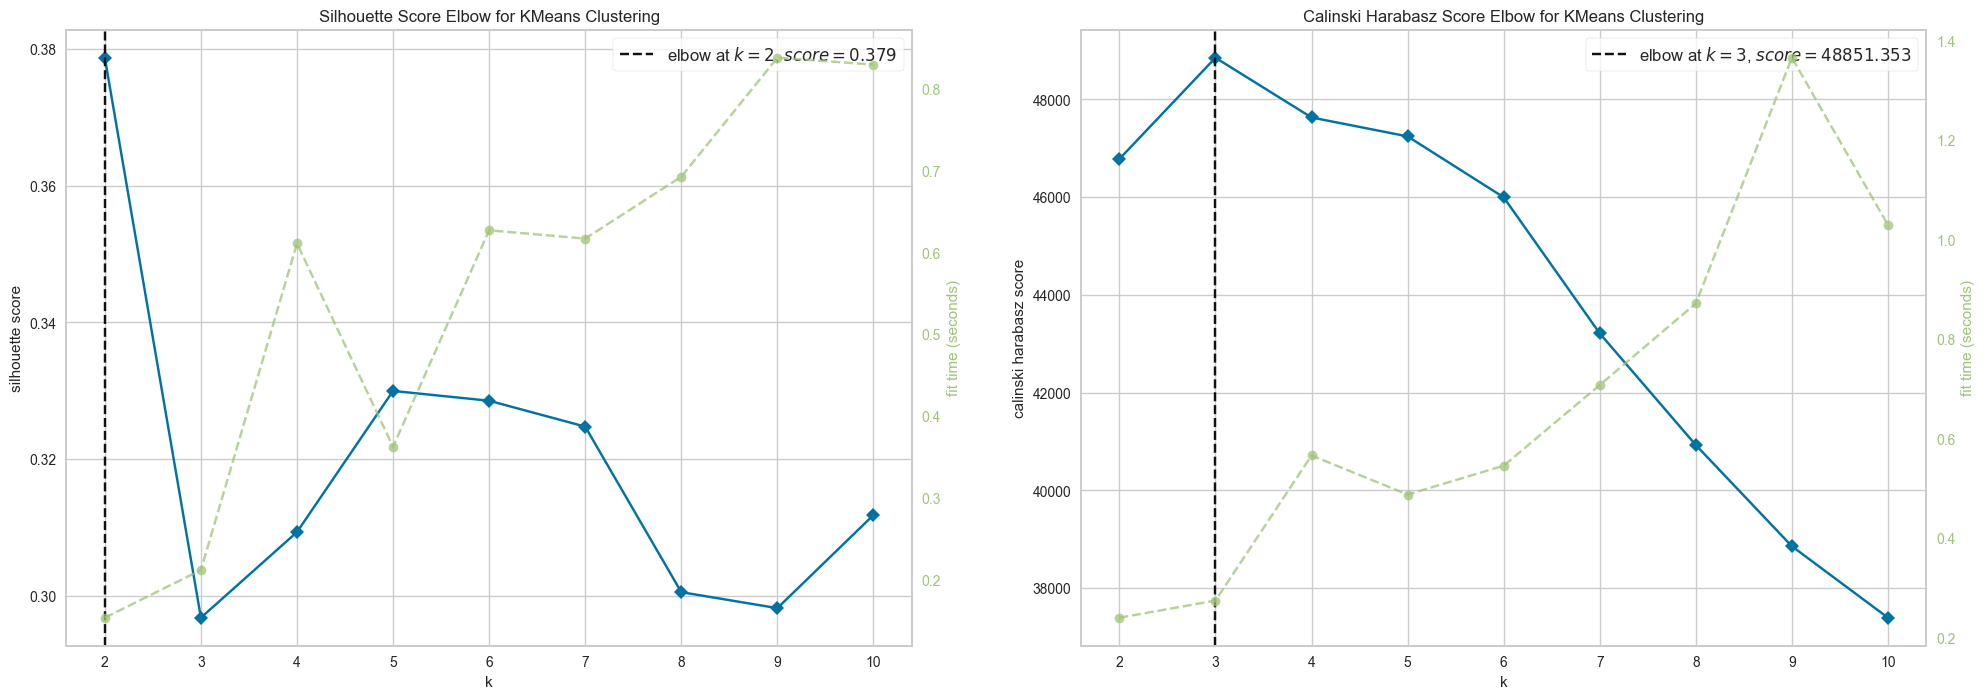

In [132]:
# Elbow method with differents metrics
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("kelbowvisualizer", KElbowVisualizer(KMeans(),
                                              K=(4,10),
                                              metric=m,
                                              ax=axes[i]))])
    kmeans_visualizer.fit(X)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()

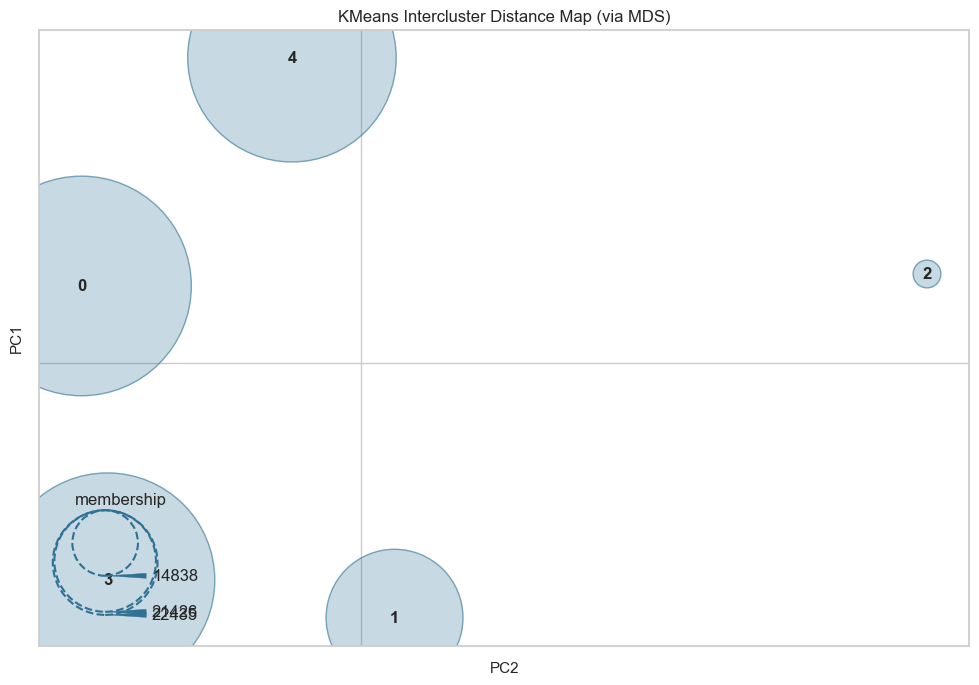

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [133]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

In [134]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model.fit(X)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_

# Scale X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled["kmeans_label"] = kmeans_labels


In [135]:
# Group by cluster
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()

In [136]:
X_scaled_clusters

nb_orders  total_spend  count_payment_sequential  \
kmeans_label                                                     
0              0.001114     0.010901                  0.001545   
1              0.000009     0.010864                  0.002116   
2              0.001788     0.013572                  0.001725   
3              0.002556     0.010787                  0.001420   
4              0.004767     0.011776                  0.001312   

              mean_payment_installments  mean_review_score  delivery_days  \
kmeans_label                                                                
0                              0.104449           0.893307       0.054006   
1                              0.109917           0.892261       0.051467   
2                              0.111092           0.058481       0.084565   
3                              0.094010           0.887157       0.056025   
4                              0.098775           0.905193       0.038401   

              favorite_sale_month  total_items  order_mean_delay  \
kmeans_label                                                       
0                        0.837385     0.005925          0.433799   
1                        0.341188     0.004914          0.661998   
2                        0.437529     0.014301          0.332468   
3                        0.136204     0.006738          0.248402   
4                        0.502105     0.008848          0.088069   

              freight_ratio  
kmeans_label                 
0                  0.211523  
1                  0.219247  
2                  0.220175  
3                  0.214427  
4                  0.219709

In [ ]:
customers.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers.groupby('customer_unique_id').size().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Length: 96096, dtype: int64

In [ ]:
category_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
order_items.head(5)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [ ]:
products.head(5)

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
geolocation.sample(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
89054                          4375       -23.656257       -46.658401   
124669                         5374       -23.577953       -46.758150   
233717                         9660       -23.654308       -46.594998   
972409                        95748       -29.494865       -51.490256   
290801                        13150       -22.637281       -47.201751   

             geolocation_city geolocation_state  
89054               sao paulo                SP  
124669              são paulo                SP  
233717  sao bernardo do campo                SP  
972409        sao jose do sul                RS  
290801             cosmopolis                SP

In [ ]:
geolocation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [ ]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [ ]:
import unidecode
def to_clean_string(column):
    space = ' '.join(column.split())
    return unidecode.unidecode(space.lower())
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(to_clean_string)

In [ ]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'sao bernardo do campo', 'jundiai', ...,
       'floriano peixoto', 'erebango', 'santa cecilia do sul'],
      dtype=object)

In [ ]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [ ]:
other_state_geolocation = geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_cleaned = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_cleaned = geolocation_cleaned.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_location = customers.merge(geolocation_cleaned,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

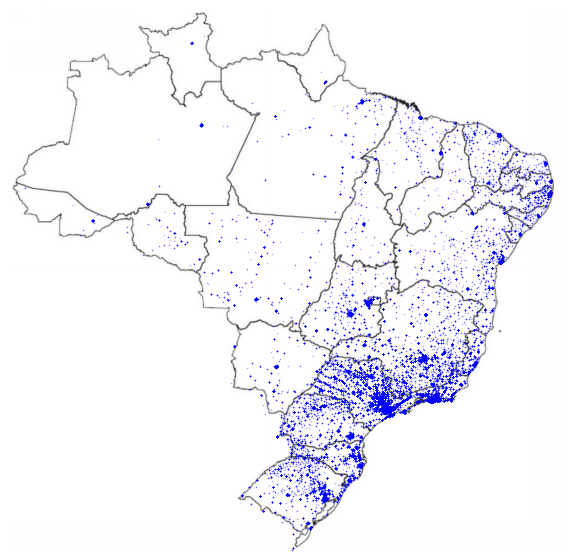

In [ ]:
import urllib
import matplotlib.image as mpimg

def orders_on_brazil_map(data):
    #brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    brazil=mpimg.imread(("/kaggle/input/brazilmap/brazil_map.jpg"),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()
    
orders_on_brazil_map(customers_location.drop_duplicates(subset='customer_unique_id'))

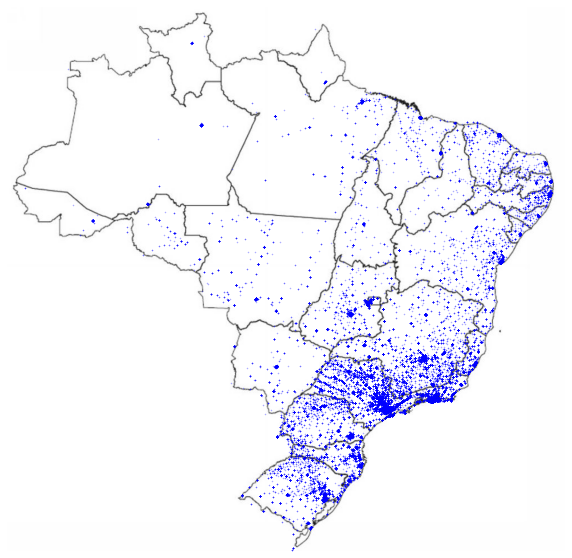

### ORDERS

In [ ]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
order_items.sample(5)

order_id  order_item_id  \
39299  595316a07cd3dea9db7adfcc7e247ae7              1   
78534  b2a55ef9c0ebd8b6d955fdffa15e7bfa              1   
17698  2897ea74f9139bdcd87a8d18548af8e2              1   
32725  4a2c053de460d64372361385b38bdb24              2   
52859  784b0448b2075a95afcf2a55310b7238              1   

                             product_id                         seller_id  \
39299  5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
78534  4328139cbe9adde0aac493ca9871eab3  8160255418d5aaa7dbdc9f4c64ebda44   
17698  a1f1aaa22f634ff796e9acad925c346d  4978a02ea9c8be7a9b5480680f40334e   
32725  bce3aa01b13b6e00307669191f690955  213b25e6f54661939f11710a6fddb871   
52859  1da0fbb35cfdc9fcb6d48dfddca69513  e88165a185134e13fdfc85d4fa654db8   

       shipping_limit_date   price  freight_value  
39299  2017-08-18 04:26:04   39.00           9.27  
78534  2018-04-25 02:51:37   72.90          14.60  
17698  2018-07-10 13:12:02  491.99          44.31  
32725  2018-08-01 16:05:16  119.85          21.69  
52859  2018-05-24 01:31:53   18.00           8.29

In [ ]:
# certaines commandes contiennent bien sûr plusieurs produits

order_items.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

In [ ]:
order_items_aggregated = order_items.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()

<AxesSubplot:xlabel='price', ylabel='freight_value'>

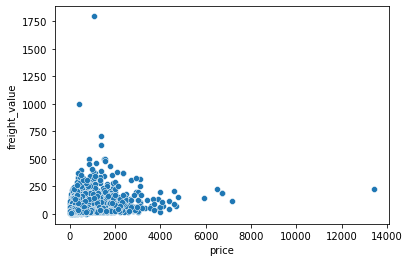

In [ ]:
import seaborn as sns
sns.scatterplot(x='price',y='freight_value',data=order_items_aggregated)

In [ ]:
order_items_aggregated.describe()

price  freight_value
count  98666.000000   98666.000000
mean     137.754076      22.823562
std      210.645145      21.650909
min        0.850000       0.000000
25%       45.900000      13.850000
50%       86.900000      17.170000
75%      149.900000      24.040000
max    13440.000000    1794.960000

In [ ]:
percentil_freight_value = order_items_aggregated['freight_value'].quantile(0.99)
order_items_aggregated = order_items_aggregated[(order_items_aggregated['price'] <= 5000) & (order_items_aggregated['freight_value'] <= percentil_freight_value)]

In [ ]:
order_items_aggregated.describe()

price  freight_value
count  97679.000000   97679.000000
mean     132.046700      21.423227
std      185.015685      14.133667
min        0.850000       0.000000
25%       45.900000      13.790000
50%       85.000000      17.070000
75%      149.900000      23.700000
max     4690.000000     104.980000

<AxesSubplot:xlabel='price', ylabel='freight_value'>

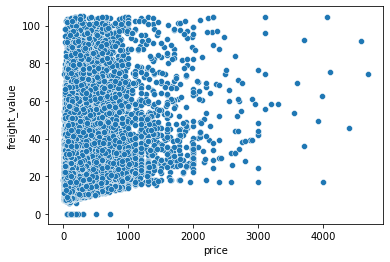

In [ ]:
sns.scatterplot(x='price',y='freight_value',data=order_items_aggregated)

In [ ]:
order_items_aggregated

order_id   price  freight_value  \
0      00010242fe8c5a6d1ba2dd792cb16214   58.90          13.29   
1      00018f77f2f0320c557190d7a144bdd3  239.90          19.93   
2      000229ec398224ef6ca0657da4fc703e  199.00          17.87   
3      00024acbcdf0a6daa1e931b038114c75   12.99          12.79   
4      00042b26cf59d7ce69dfabb4e55b4fd9  199.90          18.14   
...                                 ...     ...            ...   
98661  fffc94f6ce00a00581880bf54a75a037  299.99          43.41   
98662  fffcd46ef2263f404302a634eb57f7eb  350.00          36.53   
98663  fffce4705a9662cd70adb13d4a31832d   99.90          16.95   
98664  fffe18544ffabc95dfada21779c9644f   55.99           8.72   
98665  fffe41c64501cc87c801fd61db3f6244   43.00          12.79   

       shipping_limit_date  
0      2017-09-19 09:45:35  
1      2017-05-03 11:05:13  
2      2018-01-18 14:48:30  
3      2018-08-15 10:10:18  
4      2017-02-13 13:57:51  
...                    ...  
98661  2018-05-02 04:11:01  
98662  2018-07-20 04:31:48  
98663  2017-10-30 17:14:25  
98664  2017-08-21 00:04:32  
98665  2018-06-12 17:10:13  

[97679 rows x 4 columns]

In [ ]:
orders.describe()

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
columns_time = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in columns_time:
    orders[column] = pd.to_datetime(orders[column])

In [ ]:
orders['diff_delivery_days'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.days

In [ ]:
orders['diff_delivery_days'].describe()

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: diff_delivery_days, dtype: float64

In [ ]:
orders.groupby(orders['diff_delivery_days'] < 0).size()

diff_delivery_days
False    91614
True      7827
dtype: int64

In [ ]:
orders[(orders['diff_delivery_days'] > min(orders['diff_delivery_days'])) & (orders['diff_delivery_days'] < max(orders['diff_delivery_days'])) ]

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99436    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  diff_delivery_days  
0                        2017-10-18                 7.0  
1                        2018-08-13                 5.0  
2                        2018-09-04                17.0  
3                        2017-12-15                12.0  
4                        2018-02-26                 9.0  
...                             ...                 ...  
99436                    2017-03-28                10.0  
99437                    2018-03-02                 1.0  
99438                    2017-09-27                 5.0  
99439                    2018-02-15                20.0  
99440                    2018-04-03                17.0  

[96474 rows x 9 columns]

In [ ]:
orders['diff_delivery_days'].describe()

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: diff_delivery_days, dtype: float64

In [ ]:
orders_cleaned = orders.merge(order_items_aggregated,on='order_id',how='inner')

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_ts_decompose(decompose,figsize=(12,8)):
    fig, ax = plt.subplots(4,1,figsize=figsize)
    sns.lineplot(data=decompose.observed,x=decompose.observed.index,y=decompose.observed,ax=ax[0])
    sns.lineplot(data=decompose.trend,x=decompose.trend.index,y=decompose.trend,ax=ax[1])
    sns.lineplot(data=decompose.seasonal,x=decompose.seasonal.index,y=decompose.seasonal,ax=ax[2])
    sns.lineplot(data=decompose.resid,x=decompose.resid.index,y=decompose.resid,ax=ax[3])
    plt.tight_layout()

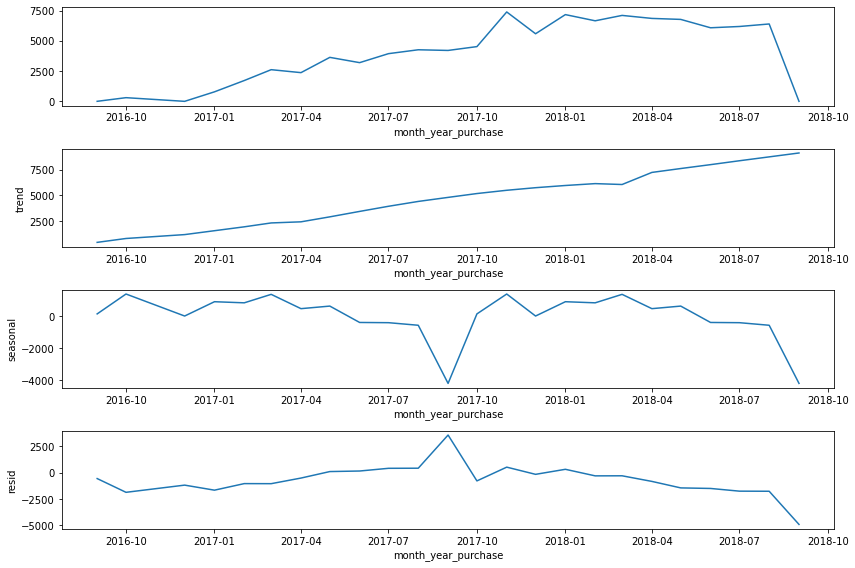

In [ ]:
orders_cleaned['month_year_purchase'] = orders_cleaned['order_purchase_timestamp'].dt.to_period('M')
order_purchase_timestamp = orders_cleaned.groupby('month_year_purchase').size()
order_purchase_timestamp.index = order_purchase_timestamp.index.astype('datetime64[ns]')

decompose = seasonal_decompose(order_purchase_timestamp,model='additive',period=12, extrapolate_trend=12)
plot_ts_decompose(decompose)

In [ ]:
import datetime
orders_w_customers = customers.merge(orders_cleaned, on='customer_id', how='inner')
max_date = max(orders_w_customers['order_purchase_timestamp']) + datetime.timedelta(days=1)

In [ ]:
rfm_df = orders_w_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'customer_id':'count',
    'price':'sum'
}).reset_index()
rfm_df.columns =['customer_id','recency','frequency','monetary']

In [ ]:
rfm_df

customer_id  recency  frequency  monetary
0      0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90
2      0000f46a3911fa3c0805444483337064      542          1     69.00
3      0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99
4      0004aac84e0df4da2b147fca70cf8255      293          1    180.00
...                                 ...      ...        ...       ...
94483  fffcc512b7dfecaffd80f13614af1d16      146          1    688.00
94484  fffea47cd6d3cc0a88bd621562a9d061      267          1     64.89
94485  ffff371b4d645b6ecea244b27531430a      573          1     89.90
94486  ffff5962728ec6157033ef9805bacc48      124          1    115.00
94487  ffffd2657e2aad2907e67c3e9daecbeb      489          1     56.99

[94488 rows x 4 columns]

count    94488.000000
mean       136.506113
std        190.946953
min          0.850000
25%         47.000000
50%         89.000000
75%        150.000000
max       4690.000000
Name: monetary, dtype: float64


<AxesSubplot:xlabel='monetary', ylabel='Count'>

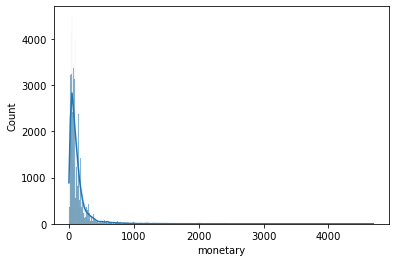

In [ ]:
print(rfm_df['monetary'].describe())
sns.histplot(x='monetary', data=rfm_df, kde=True)

<AxesSubplot:xlabel='recency', ylabel='Count'>

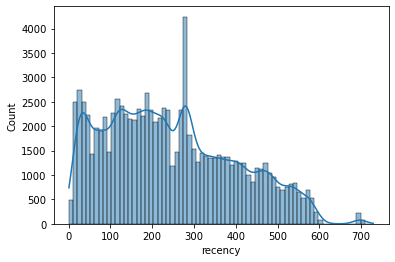

In [ ]:
sns.histplot(x='recency', data=rfm_df, kde=True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [ ]:
r_labels = k_means_group(rfm_df[['recency']],6,1,asc=True)
f_labels = k_means_group(rfm_df[['frequency']],6,1)
m_labels = k_means_group(rfm_df[['monetary']],6,1)

rfm_df = rfm_df.assign(R = r_labels, F = f_labels, M = m_labels) 

In [ ]:
rfm_df['R'] = rfm_df['R'] - 1
rfm_df['R'] = rfm_df['F'] - 1
rfm_df['R'] = rfm_df['M'] - 1

In [ ]:
rfm_df.groupby('R')['recency'].describe()

count        mean         std  min    25%    50%    75%    max
R                                                                  
0  55396.0  246.577370  153.801551  5.0  122.0  229.0  357.0  729.0
1  27899.0  236.762214  150.793461  5.0  117.0  215.0  341.0  718.0
2   7921.0  249.164121  154.831445  1.0  124.0  230.0  355.0  699.0
3   2383.0  243.666807  155.642375  6.0  118.0  219.0  347.0  699.0
4    709.0  249.571227  153.109870  9.0  124.0  235.0  364.0  698.0
5    180.0  249.722222  178.185393  9.0   95.0  212.0  439.5  584.0

In [ ]:
rfm_df.groupby('F')['frequency'].describe()

In [ ]:
def get_segments(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyals'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potentiellement loyals'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Nouveaux Clients'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Prometteurs'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return "Besoin d'attention"
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'à risque'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Dormant'
    return 'Perdus'

In [ ]:
rfm_df['segment'] = rfm_df.apply(get_segments,axis=1)


In [ ]:
plt.figure(figsize=(10,5))
percentage = (rfm_df['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="GnBu_d")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
plt.show()

In [ ]:
#TODO:
# uniformmiser les noms de villes
# visualiser sur la carte du brésil
# 

In [ ]:
 # KMEANS

In [ ]:
rfm_df

In [ ]:
rfm_df=rfm_df.drop("customer_id", axis=1).drop("segment", axis=1).drop("R", axis=1).drop("F", axis=1).drop("M", axis=1)

In [ ]:
rfm_df

In [ ]:
for c in rfm_df.columns[2:]:
    rfm_df[c] = np.log(rfm_df[c])


scaler = StandardScaler()
# scaler.fit(rfm_df.drop("customer_id", axis=1).drop("segment", axis=1))
scaler.fit(rfm_df)

RFM_Table_scaled = scaler.transform(rfm_df)
# Put data into a df
# RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=rfm_df.columns[1:])

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(RFM_Table_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(9,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Train the model on 4 clusters
kmean_model = KMeans(n_clusters=4, random_state=5)
kmean_y = kmean_model.fit_predict(RFM_Table_scaled)
# Add labels to df
rfm_df['Cluster'] = kmean_model.labels_

In [ ]:
# Function to visualize clusters
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
            'recency': 'mean',
            'frequency': 'mean',
            'monetary': ['mean', 'count']
        }).round(0)

    return df_new

rfm_values(rfm_df)


###### Que représente chaque cluster ?

- 0 : ce groupe peut être interprété comme (relativement nouveaux arrivants/faibles dépenses) car leurs dépenses sont les plus faibles de tous les groupes, mais ont la récence la plus faible. Ce cluster est assez énorme. Ainsi, un effort de marketing pourrait être conseillé à son égard afin d'augmenter sa valeur monétaire.

- 1 : peut être considéré comme notre meilleur cluster (clients fidèles) car bien que les clients de ce groupe n'aient pas commandé en moyenne depuis un certain temps, leur fréquence de commandes est supérieure à tous les autres groupes et la valeur de leurs commandes est assez élevée.

- 3 : (Perdu/Faibles dépenses) est le nom que nous pouvons donner à ce cluster. Les clients de ce groupe semblent avoir l'une des récences les plus élevées et leur valeur monétaire est faible. Ce cluster ne devrait pas faire l'objet d'efforts marketing.

- 4 : Il s'agit de notre deuxième meilleur groupe (grands dépensiers) car sa récence vient en deuxième position et le montant moyen dépensé est le plus élevé. Ce cluster est également le deuxième en nombre de clients.

In [ ]:
# DBSCAN HDBSCAN 
# AgglomerativeClustering 


# moyenne: 

# nombre de prosuite achetes
# review score
# >>> poids du colis
# temps de livraison 
# dépenses (montant)





In [ ]:
rfm_df2 = orders_w_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'customer_id':'count',
    'price':'sum'   
}).reset_index()
rfm_df2.columns =['customer_id','recency','frequency','monetary']

In [ ]:
rfm_df2['order_price_average']= rfm_df2['monetary']/rfm_df2['frequency']

In [ ]:
orders_w_customers.columns

In [ ]:
orders_w_customers.shape

In [ ]:
rfm_df2.shape

In [ ]:
# orders_w_customers = customers.merge(orders_cleaned, on='customer_id', how='inner')

In [ ]:
orders_cleaned.columns

In [ ]:
orders_w_items = customers.merge(orders_cleaned, on='order_id', how='inner')